<a href="https://colab.research.google.com/github/TQT2203/BTVN-AI/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_ti%E1%BB%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import urllib.request

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [1]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving money.zip to money.zip
✅ Giải nén hoàn tất vào thư mục: money


['dataset']

In [2]:

zip_path = "/content/money.zip"
extract_path = "/content/sample_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén xong!")

✅ Giải nén xong!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
data = []
labels = []

classes = ['000000','000200','000500','001000','002000','005000','010000','020000','050000','100000','200000','500000']
img_size = (100, 100)

for i, label in enumerate(classes):
    folder_path = os.path.join("/content/sample_data/dataset", label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0  #độ phân giải
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Lỗi ảnh: {img_path} - {e}")

data = np.array(data)
labels = to_categorical(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,849,164 (14.68 MB)

 Trainable params: 3,849,164 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1114 - loss: 6.2643 - val_accuracy: 0.2247 - val_loss: 2.4289
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2896 - loss: 2.1727 - val_accuracy: 0.2468 - val_loss: 2.1468
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.3197 - loss: 2.0389 - val_accuracy: 0.3444 - val_loss: 2.1454
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3570 - loss: 2.0722 - val_accuracy: 0.3425 - val_loss: 2.0035
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4342 - loss: 1.6760 - val_accuracy: 0.3738 - val_loss: 2.0048
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4974 - loss: 1.5719 - val_accuracy: 0.4622 - val_loss: 1.7138
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5361 - loss: 1.3993 - val_accuracy: 0.4604 - val_loss: 1.6446
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6060 - loss: 1.2943 - val_accuracy: 0.5064 - v

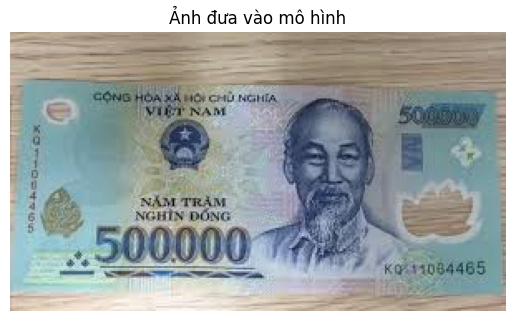

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
✅ Tờ tiền dự đoán: **500000**
🎯 Xác suất: 93.07%


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Hiển thị ảnh
    img_display = load_img(img_path)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title("Ảnh đưa vào mô hình")
    plt.show()

    # Tiền xử lý ảnh cho mô hình
    img = load_img(img_path, target_size=(100, 100))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán
    pred = model.predict(img)
    class_index = np.argmax(pred)
    confidence = np.max(pred)

    # In kết quả
    print(f"✅ Tờ tiền dự đoán: **{classes[class_index]}**")
    print(f"🎯 Xác suất: {confidence * 100:.2f}%")

# 🧪 Ví dụ
predict_image("/content/500.jpg")